# Importando bibliotecas e o dataset

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

## Importando os dados

In [2]:
chess_games = pd.read_csv("https://raw.githubusercontent.com/Vinicius-resende-cin/intro-dados/master/data/chess_games.csv", encoding = "ISO-8859-1")

In [3]:
chess_games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


# Definição de tipos

In [4]:
# verificando os tipos de todas as colunas
chess_games.dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

In [5]:
# convertendo 'object' para 'category'
chess_games['id'] = chess_games['id'].astype('category')
chess_games['victory_status'] = chess_games['victory_status'].astype('category')
chess_games['winner'] = chess_games['winner'].astype('category')
chess_games['increment_code'] = chess_games['increment_code'].astype('category')
chess_games['white_id'] = chess_games['white_id'].astype('category')
chess_games['black_id'] = chess_games['black_id'].astype('category')
chess_games['moves'] = chess_games['moves'].astype('category')
chess_games['opening_eco'] = chess_games['opening_eco'].astype('category')
chess_games['opening_name'] = chess_games['opening_name'].astype('category')

# convertendo categorico para numérico
chess_games['id'] = chess_games['id'].cat.codes
chess_games['victory_status'] = chess_games['victory_status'].cat.codes
chess_games['winner'] = chess_games['winner'].cat.codes
chess_games['increment_code'] = chess_games['increment_code'].cat.codes
chess_games['white_id'] = chess_games['white_id'].cat.codes
chess_games['black_id'] = chess_games['black_id'].cat.codes
chess_games['moves'] = chess_games['moves'].cat.codes
chess_games['opening_eco'] = chess_games['opening_eco'].cat.codes
chess_games['opening_name'] = chess_games['opening_name'].cat.codes

In [6]:
# verificando novos tipos
chess_games.dtypes

id                  int16
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status       int8
winner               int8
increment_code      int16
white_id            int16
white_rating        int64
black_id            int16
black_rating        int64
moves               int16
opening_eco         int16
opening_name        int16
opening_ply         int64
dtype: object

In [7]:
chess_games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,9068,False,1.504210e+12,1.504210e+12,13,2,2,110,1287,1500,11,1191,4524,248,1387,5
1,14512,True,1.504130e+12,1.504130e+12,16,3,0,298,16,1322,7748,1261,1987,71,750,4
2,14904,True,1.504130e+12,1.504130e+12,61,1,2,298,3823,1496,11,1500,16383,171,650,3
3,14350,True,1.504110e+12,1.504110e+12,61,1,2,187,2017,1439,134,1454,3770,241,992,3
4,3091,True,1.504030e+12,1.504030e+12,95,1,2,247,6056,1523,134,1469,15622,192,783,5


# Tratamento de dados ausentes

In [8]:
chess_games.shape

(20058, 16)

In [9]:
# verificando se há dados ausentes
print(chess_games.isnull().sum())

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64


O dataset selecionado não contém dados ausentes, portanto será feita uma remoção aleatória de dados para que possa ser realizada uma imputação em seguida

## Normalização

Antes de realizar a imputação, é necessário normalizar os dados para que a imputação seja feita de forma correta. Apenas as colunas que se referem aos ratings dos jogadores serão utilizadas.

In [10]:
# normalização entre 0 e 1
chess_games['white_rating'] = (chess_games['white_rating'] - chess_games['white_rating'].min()) \
    / (chess_games['white_rating'].max() - chess_games['white_rating'].min())
chess_games['black_rating'] = (chess_games['black_rating'] - chess_games['black_rating'].min()) \
    / (chess_games['black_rating'].max() - chess_games['black_rating'].min())

In [11]:
chess_games[['white_rating', 'black_rating']].describe()

,white_rating,black_rating
count,20058.000000,20058.000000
mean,0.424129,0.413564
std,0.152011,0.150484
min,0.000000,0.000000
25%,0.320459,0.311272
50%,0.408664,0.399690
75%,0.526618,0.514478
max,1.000000,1.000000


## Remoção de dados

In [12]:
# gerando indices aleatórios
random_indices_white_rating = np.random.choice(chess_games.index, size=int(len(chess_games)*0.05), replace=False)
random_indices_black_rating = np.random.choice(chess_games.index, size=int(len(chess_games)*0.05), replace=False)

# substituindo valores por NaN
chess_games2 = chess_games.copy()
chess_games2.loc[random_indices_white_rating, ['white_rating']] = np.nan
chess_games2.loc[random_indices_black_rating, ['black_rating']] = np.nan

In [13]:
chess_games2.isnull().sum()

id                   0
rated                0
created_at           0
last_move_at         0
turns                0
victory_status       0
winner               0
increment_code       0
white_id             0
white_rating      1002
black_id             0
black_rating      1002
moves                0
opening_eco          0
opening_name         0
opening_ply          0
dtype: int64

## Imputação de dados

### Usando a média

In [14]:
chess_games_mean_fill = chess_games2.copy()

In [15]:
print("white_rating")
print("mean:", chess_games_mean_fill['white_rating'].mean())
print("median:", chess_games_mean_fill['white_rating'].median(), end='\n\n')

print("black_rating")
print("mean:", chess_games_mean_fill['black_rating'].mean())
print("median:", chess_games_mean_fill['black_rating'].median())

white_rating
mean: 0.4243211744661159
median: 0.40866388308977036

black_rating
mean: 0.41402787039473055
median: 0.3996897621509824


In [16]:
chess_games_mean_fill['white_rating'].fillna(chess_games2['white_rating'].mean(), inplace=True)
chess_games_mean_fill['black_rating'].fillna(chess_games2['black_rating'].mean(), inplace=True)

In [17]:
chess_games_mean_fill.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [18]:
print("white_rating")
print("mean:", chess_games_mean_fill['white_rating'].mean())
print("median:", chess_games_mean_fill['white_rating'].median(), end='\n\n')

print("black_rating")
print("mean:", chess_games_mean_fill['black_rating'].mean())
print("median:", chess_games_mean_fill['black_rating'].median())

white_rating
mean: 0.42432117446611584
median: 0.4196242171189979

black_rating
mean: 0.4140278703947306
median: 0.4095139607032058


Quando a média é utilizada, o seu valor é alterado, além de afetar o valor da mediana, deslocando-a para um valor mais próximo do seu próprio.

### Usando a mediana

In [19]:
chess_games_median_fill = chess_games2.copy()

In [20]:
print("white_rating")
print("mean:", chess_games_median_fill['white_rating'].mean())
print("median:", chess_games_median_fill['white_rating'].median(), end='\n\n')

print("black_rating")
print("mean:", chess_games_median_fill['black_rating'].mean())
print("median:", chess_games_median_fill['black_rating'].median())

white_rating
mean: 0.4243211744661159
median: 0.40866388308977036

black_rating
mean: 0.41402787039473055
median: 0.3996897621509824


In [21]:
chess_games_median_fill['white_rating'].fillna(chess_games2['white_rating'].median(), inplace=True)
chess_games_median_fill['black_rating'].fillna(chess_games2['black_rating'].median(), inplace=True)

In [22]:
chess_games_median_fill.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [23]:
print("white_rating")
print("mean:", chess_games_median_fill['white_rating'].mean())
print("median:", chess_games_median_fill['white_rating'].median(), end='\n\n')

print("black_rating")
print("mean:", chess_games_median_fill['black_rating'].mean())
print("median:", chess_games_median_fill['black_rating'].median())

white_rating
mean: 0.4235390124380424
median: 0.40866388308977036

black_rating
mean: 0.41331160833170155
median: 0.3996897621509824


Quando a mediana é utilizada, o seu valor se mantém e o valor da média é levemente alterado, sem apresentar um grande impacto nas estatísticas originais.

### Usando um valor aleatório

In [24]:
chess_games_random_fill = chess_games2.copy()

In [25]:
print("white_rating")
print("mean:", chess_games_random_fill['white_rating'].mean())
print("median:", chess_games_random_fill['white_rating'].median(), end='\n\n')

print("black_rating")
print("mean:", chess_games_random_fill['black_rating'].mean())
print("median:", chess_games_random_fill['black_rating'].median())

white_rating
mean: 0.4243211744661159
median: 0.40866388308977036

black_rating
mean: 0.41402787039473055
median: 0.3996897621509824


In [26]:
# verificando os valores mínimo e máximo do white_rating
chess_games_random_fill['white_rating'].describe()

count    19056.000000
mean         0.424321
std          0.151927
min          0.000000
25%          0.320459
50%          0.408664
75%          0.526618
max          1.000000
Name: white_rating, dtype: float64

In [27]:
# verificando os valores mínimo e máximo do black_rating
chess_games_random_fill['black_rating'].describe()

count    19056.000000
mean         0.414028
std          0.150430
min          0.000000
25%          0.311789
50%          0.399690
75%          0.514995
max          1.000000
Name: black_rating, dtype: float64

In [28]:
import random
chess_games_random_fill['white_rating'].fillna(random.randint(chess_games2['white_rating'].min(), chess_games2['white_rating'].max()), inplace=True)
chess_games_random_fill['black_rating'].fillna(random.randint(chess_games2['black_rating'].min(), chess_games2['black_rating'].max()), inplace=True)

In [29]:
chess_games_random_fill.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [30]:
print("white_rating")
print("mean:", chess_games_random_fill['white_rating'].mean())
print("median:", chess_games_random_fill['white_rating'].median(), end='\n\n')

print("black_rating")
print("mean:", chess_games_random_fill['black_rating'].mean())
print("median:", chess_games_random_fill['black_rating'].median())

white_rating
mean: 0.4031241549818678
median: 0.39926931106471814

black_rating
mean: 0.44330018437740476
median: 0.4095139607032058


A utilização de valores aleatórios se mostra uma opção ruim para a imputação de dados, pois pode distorcer as estatísticas originais do dataset, perdendo assim informações importantes.

### Usando um preditor KNN

In [31]:
chess_games_knn_fill = chess_games2.copy()

#### Executando o KNN

In [32]:
%pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.


In [33]:
from fancyimpute import KNN
chess_games_knn = KNN(k=3).fit_transform(chess_games_knn_fill)

Imputing row 1/20058 with 1 missing, elapsed time: 40.634
Imputing row 101/20058 with 0 missing, elapsed time: 40.635
Imputing row 201/20058 with 0 missing, elapsed time: 40.636
Imputing row 301/20058 with 0 missing, elapsed time: 40.636
Imputing row 401/20058 with 0 missing, elapsed time: 40.637
Imputing row 501/20058 with 0 missing, elapsed time: 40.637
Imputing row 601/20058 with 0 missing, elapsed time: 40.638
Imputing row 701/20058 with 0 missing, elapsed time: 40.639
Imputing row 801/20058 with 0 missing, elapsed time: 40.639
Imputing row 901/20058 with 0 missing, elapsed time: 40.640
Imputing row 1001/20058 with 0 missing, elapsed time: 40.640
Imputing row 1101/20058 with 0 missing, elapsed time: 40.641
Imputing row 1201/20058 with 0 missing, elapsed time: 40.641
Imputing row 1301/20058 with 0 missing, elapsed time: 40.642
Imputing row 1401/20058 with 0 missing, elapsed time: 40.642
Imputing row 1501/20058 with 0 missing, elapsed time: 40.643
Imputing row 1601/20058 with 1 missi

In [34]:
chess_games_knn_fill = pd.DataFrame(chess_games_knn, columns=chess_games_knn_fill.columns)

In [35]:
chess_games_knn_fill.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,9068.0,0.0,1.504210e+12,1.504210e+12,13.0,2.0,2.0,110.0,1287.0,0.373695,11.0,0.470698,4524.0,248.0,1387.0,5.0
1,14512.0,1.0,1.504130e+12,1.504130e+12,16.0,3.0,0.0,298.0,16.0,0.280793,7748.0,0.244054,1987.0,71.0,750.0,4.0
2,14904.0,1.0,1.504130e+12,1.504130e+12,61.0,1.0,2.0,298.0,3823.0,0.371608,11.0,0.367632,16383.0,171.0,650.0,3.0
3,14350.0,1.0,1.504110e+12,1.504110e+12,61.0,1.0,2.0,187.0,2017.0,0.341858,134.0,0.343847,3770.0,241.0,992.0,3.0
4,3091.0,1.0,1.504030e+12,1.504030e+12,95.0,1.0,2.0,247.0,6056.0,0.385699,134.0,0.351603,15622.0,192.0,783.0,5.0


In [36]:
chess_games_knn_fill.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [37]:
chess_games_knn_fill[['white_rating', 'black_rating']].describe()

,white_rating,black_rating
count,20058.000000,20058.000000
mean,0.424046,0.413510
std,0.150732,0.149389
min,0.000000,0.000000
25%,0.321503,0.311789
50%,0.409186,0.399690
75%,0.524530,0.513444
max,1.000000,1.000000


O uso do KNN para imputação de dados é uma boa opção, pois ele é capaz de prever valores ausentes com base em valores próximos, sem distorcer as estatísticas originais do dataset.

#### Verificando o erro do modelo KNN

In [38]:
target_white = chess_games.loc[random_indices_white_rating, ['white_rating']]
target_black = chess_games.loc[random_indices_black_rating, ['black_rating']]
pred_white = chess_games_knn_fill.loc[random_indices_white_rating, ['white_rating']]
pred_black = chess_games_knn_fill.loc[random_indices_black_rating, ['black_rating']]

from sklearn.metrics import mean_absolute_error
print("white_rating")
print("MAE:", mean_absolute_error(target_white, pred_white), end='\n\n')

print("black_rating")
print("MAE:", mean_absolute_error(target_black, pred_black))

white_rating
MAE: 0.10350506313957891

black_rating
MAE: 0.10572639184328436


In [39]:
chess_games[['white_rating', 'black_rating']].describe()

,white_rating,black_rating
count,20058.000000,20058.000000
mean,0.424129,0.413564
std,0.152011,0.150484
min,0.000000,0.000000
25%,0.320459,0.311272
50%,0.408664,0.399690
75%,0.526618,0.514478
max,1.000000,1.000000


In [40]:
chess_games_knn_fill[['white_rating', 'black_rating']].describe()

,white_rating,black_rating
count,20058.000000,20058.000000
mean,0.424046,0.413510
std,0.150732,0.149389
min,0.000000,0.000000
25%,0.321503,0.311789
50%,0.409186,0.399690
75%,0.524530,0.513444
max,1.000000,1.000000


De acordo com os resultados obtidos, o modelo KNN apresentou um erro médio em torno de 200 de rating, o que não é um valor desprezível, mas sua distribuição compensou a variação das estatísticas, mantendo-as próximas das originais do dataset.

# Discretização

A base de dados apresenta em sua maioria dados discretos, com excessão das colunas relacionadas aos timestamps das partidas. Portanto, a discretização será feita apenas nas colunas que se referem a esses dados.

In [41]:
chess_games[['created_at', 'last_move_at']].describe()

,created_at,last_move_at
count,2.005800e+04,2.005800e+04
mean,1.483617e+12,1.483618e+12
std,2.850151e+10,2.850140e+10
min,1.376772e+12,1.376772e+12
25%,1.477548e+12,1.477548e+12
50%,1.496010e+12,1.496010e+12
75%,1.503170e+12,1.503170e+12
max,1.504493e+12,1.504494e+12


In [42]:
# discretizando com 10 bins com mesmo intervalo
chess_games['created_at_dist'] = pd.cut(chess_games['created_at'], 10)
chess_games['last_move_at_dist'] = pd.cut(chess_games['last_move_at'], 10)

<Axes: ylabel='created_at_dist'>

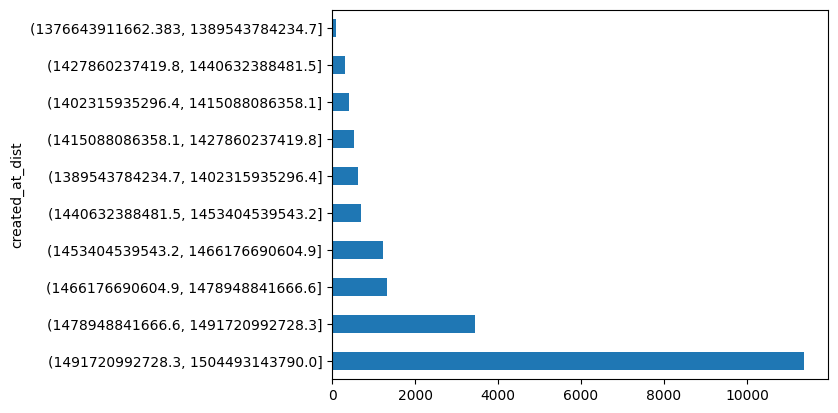

In [43]:
chess_games['created_at_dist'].value_counts().plot(kind='barh')

Dividir os dados baseando-se em intervalos iguais pode não ser a melhor opção, pois pode haver uma distribuição desigual dos dados em cada intervalo. Portanto, a melhor opção é dividir os dados baseando-se em intervalos que contenham a mesma quantidade de dados. Isso pode ser feito ao utilizar quantis para fazer a divisão.

In [48]:
# discretizando com 10 bins com mesma quantidade de elementos
chess_games['created_at_dist'] = pd.qcut(chess_games['created_at'], 10)
chess_games['last_move_at_dist'] = pd.qcut(chess_games['last_move_at'], 10)

<Axes: ylabel='created_at_dist'>

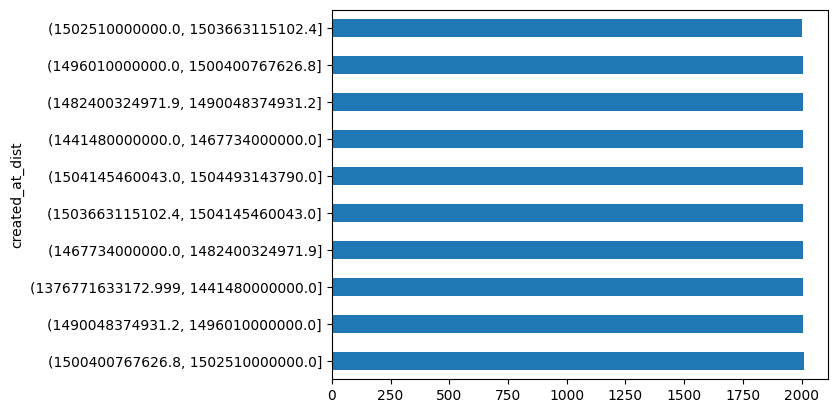

In [49]:
chess_games['created_at_dist'].value_counts().plot(kind='barh')

<Axes: ylabel='last_move_at_dist'>

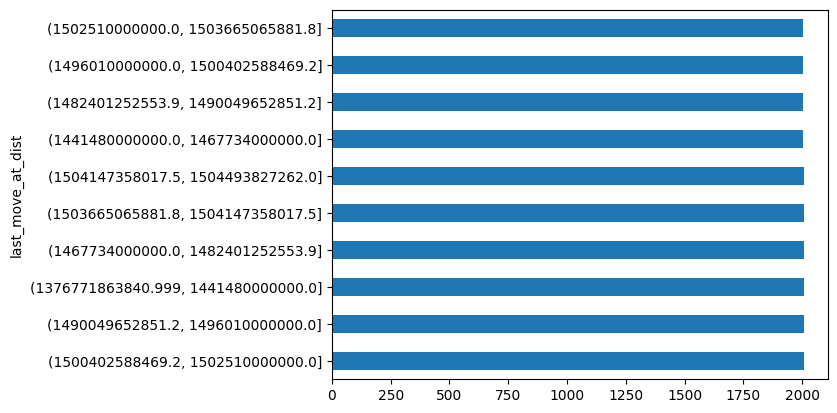

In [50]:
chess_games['last_move_at_dist'].value_counts().plot(kind='barh')

# Limpeza de Dados

# Estatísticas Descritivas

## Distribuição dos ratings de todos os jogadores

In [44]:
all_ratings = pd.concat([chess_games['white_rating'], chess_games['black_rating']])

In [45]:
all_ratings.describe()

count    40116.000000
mean         0.418846
std          0.151340
min          0.000000
25%          0.315762
50%          0.403967
75%          0.520683
max          1.000000
dtype: float64

<Axes: >

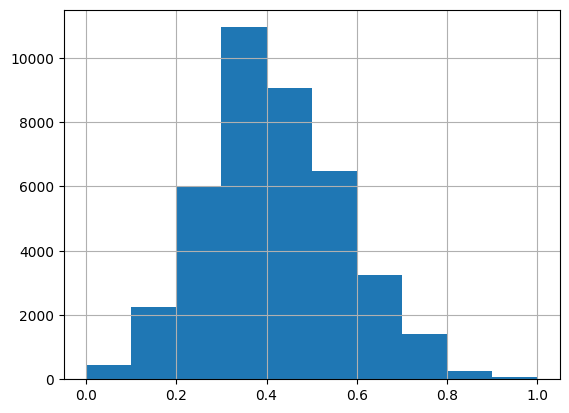

In [46]:
all_ratings.hist()

<Axes: >

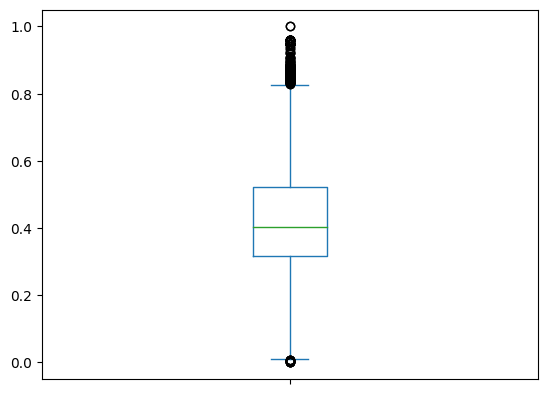

In [47]:
all_ratings.plot.box()